In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive/Github
%cd 'soil-physics-theory'
%cd 'content/chapter-6'

Mounted at /content/drive
/content/drive/MyDrive/Github
/content/drive/MyDrive/Github/soil-physics-theory
/content/drive/MyDrive/Github/soil-physics-theory/content/chapter-6


**Plot ‘typical’ hydraulic conductivity for sand, silt loam and clay soil as a function of water potential using data from Table 6.1 and eqn (6.34). Use a log–log scale and plot both saturated and unsaturated conductivity. Use the graphs to determine the water potential at which water would flow from silt loam into sand in a layered profile with infiltration.**

In [3]:
import numpy as np

In [4]:
#For sand
psi_e = -0.7 # J/kg
b = 1.7
theta_s = 0.5 # m3/m3
K_s = 0.07*(theta_s*(1-(-psi_e/33)**(1/b)))**4 #Eq. 6.34, cm/s
psi = np.logspace(0, 3, 100) # logarithmic sequence of psi values
Ksand = np.piecewise(-psi, [-psi < psi_e, -psi >= psi_e], [lambda x: K_s*(psi_e/x)**(2+3/b), K_s])


In [5]:
#For silt loam
psi_e = -2.1 # J/kg
b = 4.7
theta_s = 0.5 # m3/m3
K_s = 0.07*(theta_s*(1-(-psi_e/33)**(1/b)))**4 #Eq. 6.34, cm/s
KsiltLoam = np.piecewise(-psi, [-psi < psi_e, -psi >= psi_e], [lambda x: K_s*(psi_e/x)**(2+3/b), K_s])

In [6]:
#For clay
psi_e = -3.7 # J/kg
b = 7.6
theta_s = 0.5 # m3/m3
K_s = 0.07*(theta_s*(1-(-psi_e/33)**(1/b)))**4 #Eq. 6.34, cm/s
Kclay = np.piecewise(-psi, [-psi < psi_e, -psi >= psi_e], [lambda x: K_s*(psi_e/x)**(2+3/b), K_s])

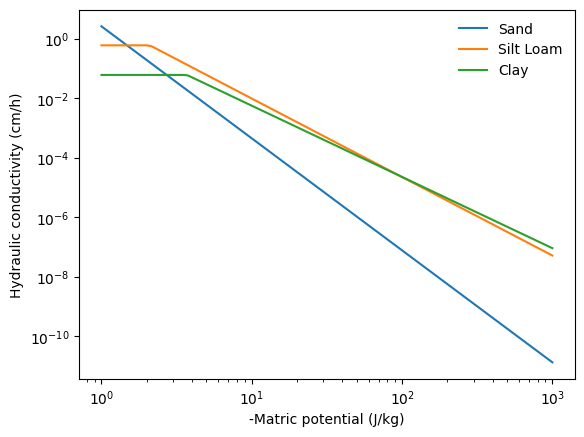

In [7]:
#Plot results
import matplotlib.pyplot as plt
plt.loglog(psi,Ksand*3600)
plt.loglog(psi,KsiltLoam*3600)
plt.loglog(psi,Kclay*3600)
plt.xlabel('-Matric potential (J/kg)')
plt.ylabel('Hydraulic conductivity (cm/h)')
plt.legend(['Sand', 'Silt Loam', 'Clay'], frameon=False)
plt.legend
plt.show()

In [8]:
from PSP_hydraulicConductivity import *


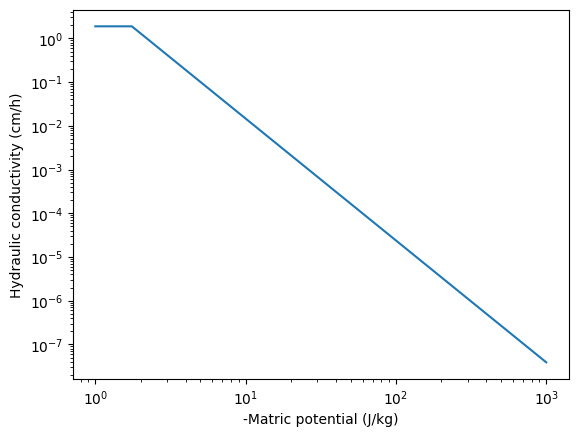

In [10]:
silt = 0.2 # mass fraction of silt (g/g)
clay = 0.2 # mass fraction of clay (g/g)
bulkDensity = 1200. # bulk density (kg/m^3)
K, psi = hydraulicConductivity(silt,clay,bulkDensity)

plt.loglog(psi,K*3600)
plt.xlabel('-Matric potential (J/kg)')
plt.ylabel('Hydraulic conductivity (cm/h)')
plt.show()